In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('motorcycle-crash-data.csv', low_memory=False)

In [3]:
for i in df.columns:
    print(i)

Unnamed: 0
Crash Record Number
County Code
County Name
Municipality Code
Municipality Name
District Code
District Name
Police Agency Code
Police Agency Name
Crash Year
Crash Month
Day of Week
Time of Day
Hour of Day
Illumination
Weather
Road Condition
Collision Type
Work Zone Type
Work Zone Location
Intersection Type
Traffic Control Device
Location Type
Urban / Rural
Fatality Count
Injury Count
Person Count
Total Unit Count
School Bus Indicator
School Zone Indicator
Latitude
Longitude
Arrival Time
Dispatch Time
Construction Zone Speed Limit
Estimated Hours Closed
Lane Closed
Lane Closure Direction
Notify Highway Maintenance
Special Jurisdiction
Traffic Control Device Function
Traffic Detour
Workers Present
Work Zone Close/Detour
Work Zone Flagger
Work Zone Law Officer
Work Zone Closure
Work Zone Moving
Work Zone Other
Work Zone Shoulder/Median
Vehicle Count
Automobile Count
Motorcycle Count
Bus Count
Small Truck Count
Heavy Truck Count
SUV Count
Van Count
Bicycle Count
Suspected Seriou

In [46]:
datetime_df = df[df['Vehicle Count'] == 1][['Crash Year',
'Crash Month',
'Day of Week',
'Time of Day',
'Hour of Day',
'Motorcycle Death Count',
'Unlicensed']]
datetime_df['Count'] = 1

In [47]:
by_year = pd.DataFrame(datetime_df.groupby('Crash Year')['Count'].count())

In [48]:
by_year.reset_index(level=0, inplace=True)

In [49]:
by_year

,Crash Year,Count
0,1997,1151
1,1998,1292
2,1999,1303
3,2000,1399
4,2001,1287
5,2002,1468
6,2003,1518
7,2004,1835
8,2005,2055
9,2006,1993


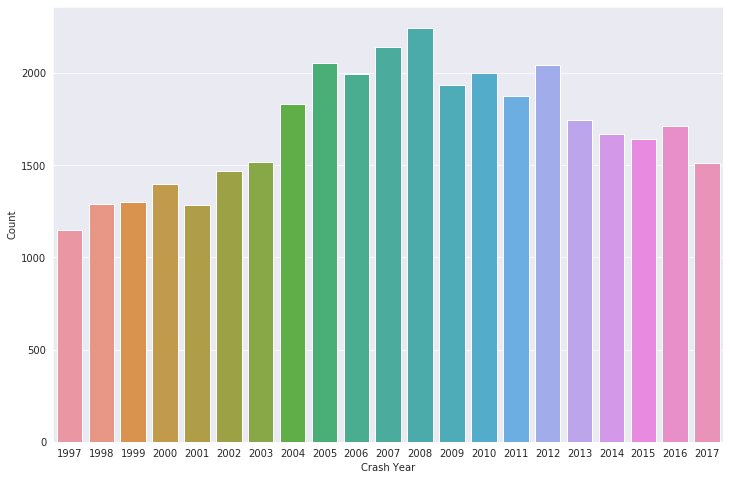

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(x='Crash Year', y='Count', data=by_year)

In [51]:
datetime_df

,Crash Year,Crash Month,Day of Week,Time of Day,Hour of Day,Motorcycle Death Count,Unlicensed,Count
0,2016,1,7.0,1405.0,14.0,0,No,1
1,2016,1,7.0,1945.0,19.0,0,No,1
7,2016,1,5.0,1521.0,15.0,0,No,1
8,2016,1,7.0,907.0,9.0,0,No,1
10,2016,1,7.0,545.0,5.0,0,No,1
...,...,...,...,...,...,...,...,...
71666,2017,11,4.0,2322.0,23.0,0,No,1
71667,2017,7,4.0,1604.0,16.0,0,No,1
71670,2017,4,2.0,2035.0,20.0,0,No,1
71671,2017,7,7.0,1647.0,16.0,0,No,1


In [52]:
by_year_death = pd.DataFrame(datetime_df.groupby('Crash Year')['Motorcycle Death Count'].sum()).reset_index(level=0)

In [53]:
by_year_death

,Crash Year,Motorcycle Death Count
0,1997,32
1,1998,46
2,1999,47
3,2000,66
4,2001,59
5,2002,56
6,2003,72
7,2004,66
8,2005,84
9,2006,75


In [54]:
death_percent_year = pd.merge(by_year, by_year_death, on='Crash Year')

In [55]:
death_percent_year

,Crash Year,Count,Motorcycle Death Count
0,1997,1151,32
1,1998,1292,46
2,1999,1303,47
3,2000,1399,66
4,2001,1287,59
5,2002,1468,56
6,2003,1518,72
7,2004,1835,66
8,2005,2055,84
9,2006,1993,75


In [56]:
death_percent_year['Fatality Percent'] = death_percent_year['Motorcycle Death Count'] / death_percent_year['Count']

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x='Crash Year', y='Fatality Percent', data=death_percent_year, hue='Unlicensed')

ValueError: Could not interpret input 'Unlicensed'

<Figure size 864x576 with 0 Axes>

In [59]:
datetime_df['Unlicensed'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [60]:
datetime_df

,Crash Year,Crash Month,Day of Week,Time of Day,Hour of Day,Motorcycle Death Count,Unlicensed,Count
0,2016,1,7.0,1405.0,14.0,0,0,1
1,2016,1,7.0,1945.0,19.0,0,0,1
7,2016,1,5.0,1521.0,15.0,0,0,1
8,2016,1,7.0,907.0,9.0,0,0,1
10,2016,1,7.0,545.0,5.0,0,0,1
...,...,...,...,...,...,...,...,...
71666,2017,11,4.0,2322.0,23.0,0,0,1
71667,2017,7,4.0,1604.0,16.0,0,0,1
71670,2017,4,2.0,2035.0,20.0,0,0,1
71671,2017,7,7.0,1647.0,16.0,0,0,1


In [64]:
by_year_unlicensed = pd.DataFrame(datetime_df[datetime_df['Motorcycle Death Count'] > 0].groupby('Crash Year')['Unlicensed'].sum()).reset_index(level=0)

In [65]:
by_year_unlicensed

,Crash Year,Unlicensed
0,1997,0
1,1998,0
2,1999,1
3,2000,0
4,2001,0
5,2002,0
6,2003,0
7,2004,0
8,2005,2
9,2006,1


In [66]:
by_month = pd.DataFrame(datetime_df.groupby('Crash Month')['Count'].count()).reset_index(level=0)

In [67]:
by_month

,Crash Month,Count
0,1,265
1,2,433
2,3,1458
3,4,3223
4,5,4665
5,6,5469
6,7,5938
7,8,5360
8,9,4512
9,10,2803


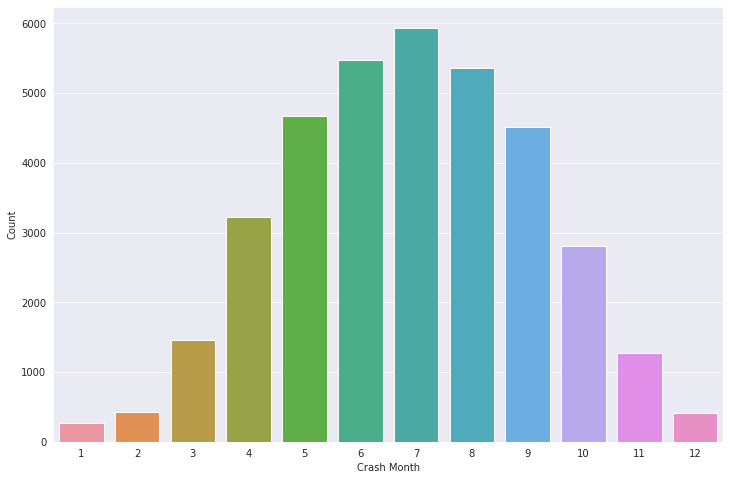

In [69]:
plt.figure(figsize=(12,8))
sns.barplot(x='Crash Month', y='Count', data=by_month)

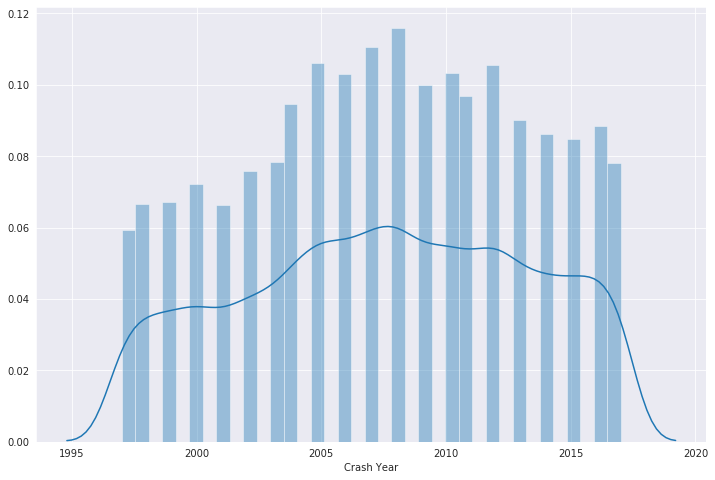

In [74]:
plt.figure(figsize=(12,8))
sns.distplot(datetime_df['Crash Year'])

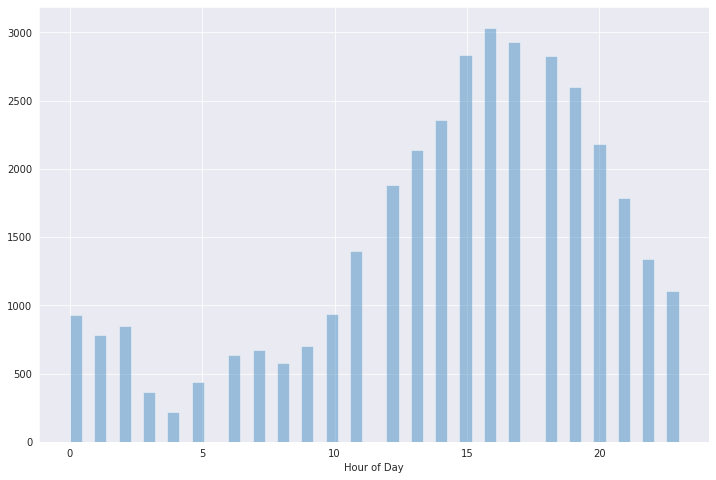

In [80]:
plt.figure(figsize=(12,8))
sns.distplot(datetime_df[datetime_df['Hour of Day'] < 24]['Hour of Day'].dropna(), kde=False)

In [77]:
datetime_df['Hour of Day'].unique()

array([14., 19., 15.,  9.,  5.,  2., 17., 22., 13., 18., 23., 12., 21.,
       10., 16., 11.,  8.,  6.,  1., 20.,  0.,  7., 99.,  3.,  4., nan])